<a href="https://colab.research.google.com/github/i-am-U-hyUn/webs-youtube/blob/main/04_week_mission_booster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn**
##**columns**:
여기 각 열들의 설명은 kaggle의 데이터 설명을 가져왔습니다.
1. RowNumber—corresponds to the record (row) number and has no effect on the output.

2. CustomerId—contains random values and has no effect on customer leaving the bank.

3. Surname—the surname of a customer has no impact on their decision to leave the bank.

4. CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

5. Geography—a customer’s location can affect their decision to leave the bank.

6. Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

7. Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

8. tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

9. Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

10. NumOfProducts—refers to the number of products that a customer has purchased through the bank.

11. HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

12. IsActiveMember—active customers are less likely to leave the bank.

13. EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

14. Exited—whether or not the customer left the bank.

15. Complain—customer has complaint or not. Satisfaction

16. Score—Score provided by the customer for their complaint resolution.

17. Card Type—type of card hold by the customer.

18. Points Earned—the points earned by the customer for using credit card.

## kaggle에서 Bank Customer Churn 데이터 가져오기
https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data


In [ ]:
# !pip install kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 /root/.kaggle/kaggle.json
# !kaggle datasets download -d radheshyamkollipara/bank-customer-churn

In [ ]:
# from zipfile import ZipFile
# file_name="/content/bank-customer-churn.zip"

# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print('Done')

## 미션 1) 데이터 로드와 피처엔지니어링 🔍📊

- 데이터셋을 탐색하여 기본적인 통계, 분포, 결측치 등을 확인합니다.
- 필요에 따라 결측치 처리, 이상치 제거, 데이터 형식 변환 등의 전처리 작업을 수행합니다.
- 피처 엔지니어링을 통해 데이터의 특성에 맞게 피처를 선택, 생성, 변환합니다. 예를 들어, 범주형 데이터의 경우 One-hot encoding을 적용할 수 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
bank = pd.read_csv("Customer-Churn-Records.csv")

In [ ]:
bank.shape

(10000, 18)

In [ ]:
bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

🔍 필요 없다고 판단되는 "RowNumber","Surname","CustomerId"개의 열을 지워줍니다.

=> 이것은 고객 정보를 나타내기 위함이지 직접적으로 고객의 이탈여부와는 관련이 없습니다.

In [ ]:
bank.drop(["RowNumber","Surname","CustomerId"], axis = 1, inplace=True)

In [ ]:
bank.shape

(10000, 15)

In [ ]:
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

🔍 현재 info 상으로는 결측치가 없는 것으로 보이는데 결측치를 0이나 다른 특정 값으로 채웠을 수도 있기 때문에 추가적인 확인 필요합니다

In [ ]:
# 수치형으로 된 열들의 요약정보
bank.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
# 문자로된 열들의 요약정보
bank.describe(include="object")

,Geography,Gender,Card Type
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


In [ ]:
bank.nunique()

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

In [ ]:
# 수치형 변수 찾기
bank_unique = bank.nunique()
numeric_list = bank_unique[bank_unique > 11].index.tolist()
numeric_list

['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

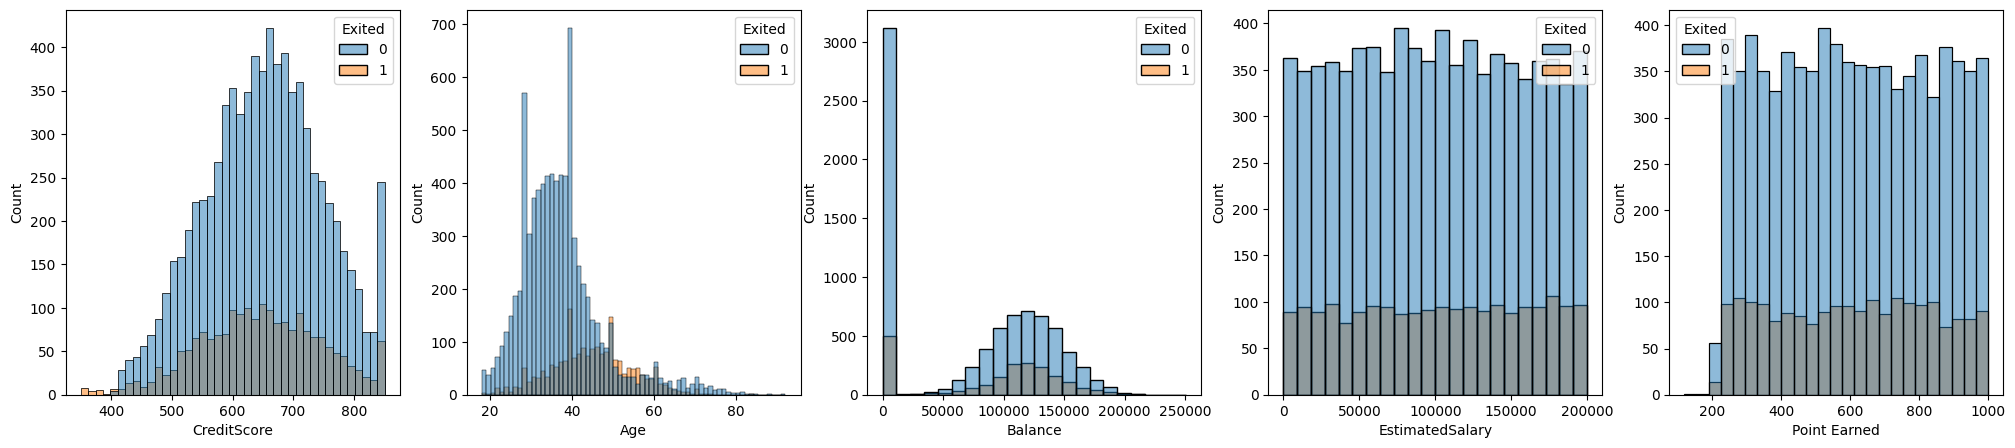

In [ ]:
# 수치형 시각화해서 보기
fig, axs = plt.subplots(ncols = 5, nrows=1, figsize=(25,5))
for n, column in enumerate(numeric_list):
  col = n % 5
  sns.histplot(data=bank, x=column, hue="Exited", ax=axs[col])

In [ ]:
# 변수의 상관관계 확인해 보기
bank.corr(numeric_only=True)["Exited"].sort_values(ascending=False)

Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Tenure               -0.013656
CreditScore          -0.026771
NumOfProducts        -0.047611
IsActiveMember       -0.156356
Name: Exited, dtype: float64

In [ ]:
# credit_score 범주형으로 만들기
bank["credit_cat"] = pd.cut(bank["CreditScore"], bins=[340.0,580.0,670.0,740,850.0], labels=["poor", "fair", "good", "excellent"])

# 나이 범주형으로 만들기
bank["age_cat"] = pd.cut(bank["Age"], bins=[17.0,30.0,40.0,50.0,np.inf], labels=["20s", "30s", "40s", "50+"])

# Balance 범주형으로 만들기
bank["balance_cat"] = pd.cut(bank["Balance"], bins=[-np.inf,1.0,100000.0,125000.0,np.inf], labels=["low", "middle", "high", "very_high"])

# EstimatedSalary 범주형으로 만들기
bank["estimateSalary_cat"] = pd.cut(bank["EstimatedSalary"], bins=[11.0, 51000.0, 100000.0, 150000.0, np.inf], labels=["low", "middle", "high", "very_high"])

# pointEarned 범주형으로 만들기
bank["point_cat"] = pd.cut(bank["Point Earned"], bins=[118.0, 400.0, 600.0, 800.0, np.inf], labels=["low", "middle", "high", "very_high"])

# Tenure의 범주를 11개에서 5개로 줄이기
bank["tenure_cat"] = pd.cut(bank["Tenure"], bins=[-np.inf, 2.0, 4.0, 6.0, 8.0, np.inf], labels=["0-2", "2-4", "4-6", "6-8", "8-10"])

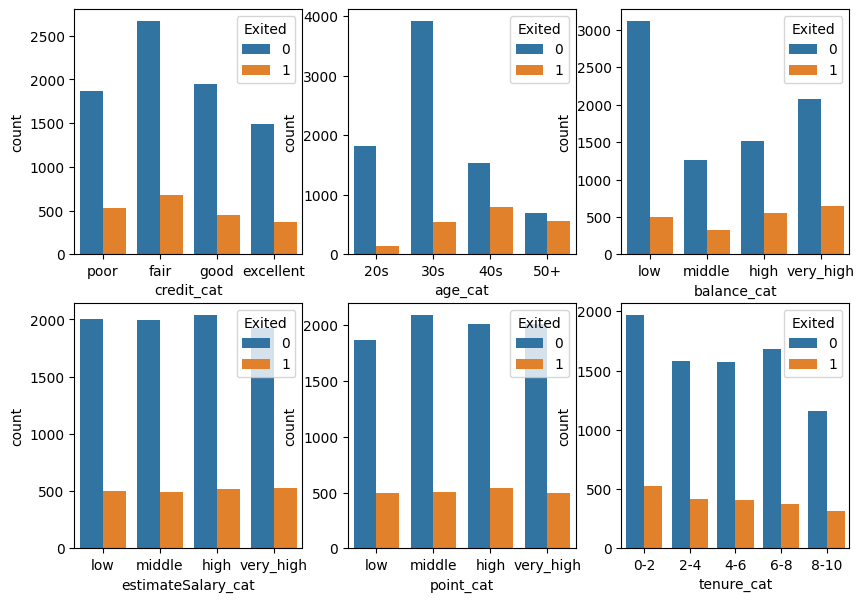

In [ ]:
num_to_cat = ["credit_cat","age_cat","balance_cat","estimateSalary_cat","point_cat","tenure_cat"]
fig, axs = plt.subplots(ncols = 3, nrows=2, figsize=(10,7))
for n, column in enumerate(num_to_cat):
  col = n % 3
  row = n //3
  sns.countplot(data=bank, x=column, hue="Exited", ax=axs[row][col])

In [ ]:
# Geography에 어떤 나라 포함되었는지 확인하기
bank["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# 프랑스만 모아둔 것
bank_f = bank[bank["Geography"]=="France"].copy()
bank_f.drop("Geography", axis = 1, inplace=True)

# 독일만 모아둔 것
bank_g = bank[bank["Geography"]=="Germany"].copy()
bank_g.drop("Geography", axis = 1, inplace=True)

# 스페인만 모아둔 것
bank_s = bank[bank["Geography"]=="Spain"].copy()
bank_s.drop("Geography", axis = 1, inplace=True)

# 전체 데이터에서도 지역 열 지워주기
bank.drop("Geography", axis = 1, inplace=True)

In [ ]:
# 범주형으로 바뀐 수치형들도 지워주기
bank.drop(numeric_list, axis=1, inplace=True)
bank.drop("Tenure", axis = 1, inplace=True)

In [ ]:
# one-hot encoding
ohe_bank = pd.get_dummies(bank.iloc[:,bank.columns != "Exited"])
ohe_bank.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,...,estimateSalary_cat_very_high,point_cat_low,point_cat_middle,point_cat_high,point_cat_very_high,tenure_cat_0-2,tenure_cat_2-4,tenure_cat_4-6,tenure_cat_6-8,tenure_cat_8-10
0,619,42,2,0.00,1,1,1,101348.88,1,2,...,0,0,1,0,0,1,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,3,...,0,0,1,0,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,...,0,1,0,0,0,0,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,...,0,1,0,0,0,1,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
ohe_bank.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER',
       'credit_cat_poor', 'credit_cat_fair', 'credit_cat_good',
       'credit_cat_excellent', 'age_cat_20s', 'age_cat_30s', 'age_cat_40s',
       'age_cat_50+', 'balance_cat_low', 'balance_cat_middle',
       'balance_cat_high', 'balance_cat_very_high', 'estimateSalary_cat_low',
       'estimateSalary_cat_middle', 'estimateSalary_cat_high',
       'estimateSalary_cat_very_high', 'point_cat_low', 'point_cat_middle',
       'point_cat_high', 'point_cat_very_high', 'tenure_cat_0-2',
       'tenure_cat_2-4', 'tenure_cat_4-6', 'tenure_cat_6-8',
       'tenure_cat_8-10'],
      dtype='object')

## 미션 2 & 3) 모델 선택 🧠 및 모델 훈련 🤖

분류 문제에 적합한 머신러닝 알고리즘을 선택합니다. 예를 들어, 로지스틱 회귀, 결정 트리, 랜덤 포레스트, 서포트 벡터 머신(SVM), 그라디언트 부스팅 등이 있습니다. 베이스라인 모델 생성하여 성능의 기준점을 설정합니다.

데이터셋을 훈련 세트와 테스트 세트로 분할합니다. 일반적으로 데이터의 70-80%를 훈련용으로, 나머지를 테스트용으로 사용합니다. 모델에 학습 데이터셋과 정답을 학습시키고 예측 데이터셋으로 예측을 진행합니다.

In [ ]:
X = ohe_bank
y = bank["Exited"]

In [ ]:
# train, test set을 만들어 줍니다
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(X, y,
                                                                       stratify = y,
                                                                       test_size = 0.2,
                                                                       random_state=42)

In [ ]:
print("train_set: ", train_input.shape, train_target.shape)
print("test_set: ", test_input.shape, test_target.shape)

train_set:  (8000, 42) (8000,)
test_set:  (2000, 42) (2000,)


In [ ]:
# 기본 모델 DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(random_state=42)

In [ ]:
print("train_score: ", dt.score(train_input, train_target))
print("test_score: ", dt.score(test_input, test_target))

train_score:  1.0
test_score:  0.997


In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(train_input, train_target)

RandomForestClassifier(random_state=42)

In [ ]:
print("train_score: ", rf.score(train_input, train_target))
print("test_score: ", rf.score(test_input, test_target))

train_score:  1.0
test_score:  0.9985


In [ ]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(train_input, train_target)

GradientBoostingClassifier(random_state=42)

In [ ]:
print("train_score: ", gb.score(train_input, train_target))
print("test_score: ", gb.score(test_input, test_target))

train_score:  0.99975
test_score:  0.998


## 미션 4) 하이퍼파라미터 튜닝 ⚙️

그리드 서치, 랜덤 서치 등을 활용하여 모델의 하이퍼파라미터를 조정하여 모델의 성능을 최적화합니다. 이 때, 모델의 일반화 성능을 평가하기 위해 교차 검증을 수행합니다.
(참고) xgboost, lightGBM, catBoost는 하이퍼파라미터 튜닝 기능을 제공합니다.

In [ ]:
models = [DecisionTreeClassifier(random_state=42),
             RandomForestClassifier(random_state=42),
             GradientBoostingClassifier(random_state=42)
            ]

In [ ]:
model_name = []
for mn in models:
  model_name.append(mn.__class__.__name__)
model_name

['DecisionTreeClassifier',
 'RandomForestClassifier',
 'GradientBoostingClassifier']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

best_params = []
best_val_score = []
cv_result = []
test_score = []

for model in models:
  params = {"max_depth": np.random.randint(3,20,10),
          "max_features": np.random.uniform(0.3,1.0,10)}
  if model.__class__.__name__ != "DecisionTreeClassifier":
    params["n_estimators"] = np.random.randint(100,500,10)
  if  model.__class__.__name__ == "GradientBoostingClassifier":
    params["learning_rate"] = np.random.uniform(0.1,0.5,100)
  rs = RandomizedSearchCV(model, params, n_iter=10, cv=5, n_jobs=-1, scoring="accuracy", random_state=42, verbose=2)
  rs.fit(train_input,train_target)
  best_params.append(rs.best_params_)
  best_val_score.append(rs.best_score_)
  cv_result.append(rs.cv_results_)
  test_score.append(rs.score(test_input, test_target))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


n_iter을 100으로 하니깐 10분 넘게 결과가 안나와서 10으로 바꾸어 했습니다.

In [ ]:
result = pd.DataFrame({"model": model_name,
                       "best_params": best_params,
                       "best_val_score": best_val_score,
                       "test_score": test_score})
result

,model,best_params,best_val_score,test_score
0,DecisionTreeClassifier,"{'max_features': 0.8548216989147666, 'max_dept...",0.997750,0.9980
1,RandomForestClassifier,"{'n_estimators': 230, 'max_features': 0.840888...",0.998625,0.9985
2,GradientBoostingClassifier,"{'n_estimators': 339, 'max_features': 0.322371...",0.998625,0.9985


In [ ]:
cv_result_df = pd.DataFrame({"model": model_name,
                             "cv_result":cv_result})
cv_result_df

,model,cv_result
0,DecisionTreeClassifier,"{'mean_fit_time': [0.030388069152832032, 0.027..."
1,RandomForestClassifier,"{'mean_fit_time': [3.4763986587524416, 1.44957..."
2,GradientBoostingClassifier,"{'mean_fit_time': [1.8035333633422852, 1.46433..."


In [ ]:
# DecisionTree
dt_cv = pd.DataFrame(cv_result_df.loc[0, "cv_result"]).sort_values(by="rank_test_score")
dt_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.028934,0.002317,0.004750,0.000282,0.854822,6,"{'max_features': 0.8548216989147666, 'max_dept...",0.998750,0.998750,0.996875,0.996875,0.9975,0.997750,0.000848,1
2,0.026399,0.001500,0.005843,0.001310,0.53629,11,"{'max_features': 0.5362896696203117, 'max_dept...",0.996250,0.996875,0.995625,0.998125,0.9975,0.996875,0.000884,2
7,0.025936,0.000816,0.004649,0.000102,0.53629,17,"{'max_features': 0.5362896696203117, 'max_dept...",0.996250,0.996875,0.995625,0.998125,0.9975,0.996875,0.000884,2
8,0.026019,0.001357,0.005242,0.000514,0.53629,15,"{'max_features': 0.5362896696203117, 'max_dept...",0.996250,0.996875,0.995625,0.998125,0.9975,0.996875,0.000884,2
5,0.035475,0.010805,0.005750,0.001446,0.977773,8,"{'max_features': 0.9777734280966333, 'max_dept...",0.998125,0.997500,0.996250,0.996875,0.9950,0.996750,0.001075,5


In [ ]:
# RandomForest
rf_cv = pd.DataFrame(cv_result_df.loc[1, "cv_result"]).sort_values(by="rank_test_score")
rf_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.476399,0.607699,0.054974,0.003445,230,0.840888,12,"{'n_estimators': 230, 'max_features': 0.840888...",0.99875,0.99875,0.998125,0.999375,0.998125,0.998625,0.000468,1
1,1.449578,0.302513,0.036532,0.006297,108,0.476669,4,"{'n_estimators': 108, 'max_features': 0.476668...",0.99875,0.99875,0.998125,0.999375,0.998125,0.998625,0.000468,1
2,4.887905,0.862654,0.084722,0.015772,315,0.804487,8,"{'n_estimators': 315, 'max_features': 0.804487...",0.99875,0.99875,0.998125,0.999375,0.998125,0.998625,0.000468,1
3,3.915880,0.435500,0.099119,0.039920,315,0.529662,7,"{'n_estimators': 315, 'max_features': 0.529662...",0.99875,0.99875,0.998125,0.999375,0.998125,0.998625,0.000468,1
4,6.088384,0.588056,0.096799,0.014211,389,0.840888,12,"{'n_estimators': 389, 'max_features': 0.840888...",0.99875,0.99875,0.998125,0.999375,0.998125,0.998625,0.000468,1


In [ ]:
# GradientBoosting
gb_cv = pd.DataFrame(cv_result_df.loc[2, "cv_result"]).sort_values(by="rank_test_score")
gb_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,1.464335,0.135722,0.011435,0.000666,339,0.322371,15,0.371217,"{'n_estimators': 339, 'max_features': 0.322371...",0.99875,0.99875,0.998125,0.999375,0.998125,0.998625,0.000468,1
4,3.073519,0.629399,0.016792,0.003632,256,0.322371,11,0.378513,"{'n_estimators': 256, 'max_features': 0.322371...",0.99875,0.99875,0.998125,0.999375,0.998125,0.998625,0.000468,1
9,4.529150,1.000378,0.019474,0.001795,240,0.322371,11,0.219546,"{'n_estimators': 240, 'max_features': 0.322371...",0.99875,0.99875,0.998125,0.999375,0.998125,0.998625,0.000468,1
0,1.803533,0.096369,0.009675,0.000489,256,0.781536,9,0.278163,"{'n_estimators': 256, 'max_features': 0.781535...",0.99875,0.99875,0.997500,0.998750,0.998125,0.998375,0.000500,4
3,1.918835,0.256265,0.009071,0.000478,218,0.828254,15,0.233962,"{'n_estimators': 218, 'max_features': 0.828253...",0.99875,0.99875,0.997500,0.998750,0.998125,0.998375,0.000500,4


## 미션 5) 모델 평가 및 선택 🎯

학습된 모델을 테스트 데이터 또는 새로운 데이터에 적용하여 성능을 평가합니다. 이때 사용할 평가 지표는 태스크에 따라 다를 수 있습니다. 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1-score 등을 고려합니다.

In [ ]:
# decisionTree
result["best_params"][0]

{'max_features': 0.8548216989147666, 'max_depth': 6}

In [ ]:
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier(max_features= 0.8548216989147666, max_depth= 6, random_state=42)
dt.fit(train_input, train_target)
print("accuracy: ", dt.score(test_input, test_target))
y_pred = dt.predict(test_input)
print(classification_report(test_target, y_pred))

accuracy:  0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      0.99      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
# RandomForest
result["best_params"][1]

{'n_estimators': 230, 'max_features': 0.8408881486749953, 'max_depth': 12}

In [ ]:
rf = RandomForestClassifier(n_estimators= 230, max_features= 0.8408881486749953, max_depth= 12, random_state=42)
rf.fit(train_input, train_target)
print("accuracy: ", rf.score(test_input, test_target))
y_pred = rf.predict(test_input)
print(classification_report(test_target, y_pred))

accuracy:  0.9985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
# GradientBoosting
result["best_params"][2]

{'n_estimators': 339,
 'max_features': 0.32237116949068884,
 'max_depth': 15,
 'learning_rate': 0.371217020620222}

In [ ]:
gb= GradientBoostingClassifier(n_estimators= 339, max_features= 0.32237116949068884, max_depth= 15, learning_rate= 0.371217020620222, random_state=42)
gb.fit(train_input, train_target)
print("accuracy: ", gb.score(test_input, test_target))
y_pred = gb.predict(test_input)
print(classification_report(test_target, y_pred))

accuracy:  0.9985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

